In [1]:
%cd ..

/workspaces/stuFootball360


In [3]:
import cv2
import h5py
import json
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

from src.backstage.dataset import FootballDataset
from src.backstage.utils import rescale, buildMaps, undistort

In [4]:
def showImage(x, h=9):
    fig = plt.figure(figsize=(h*16.0/9.0,h))
    plt.axis("off")
    plt.imshow(x)
    plt.show()
    plt.close()

#------------------------------------------------------------------------------
#   Eval Utils

def merge(x1, x2):
    H,W,C = x1.shape
    result = np.zeros(shape=(H,W*2,C), dtype=x1.dtype)
    result[:,0:W,:] = x1
    result[:,W:2*W,:] = x2
    return result

def displayAndFix(x, dc, scaleShape=(640, 360), h=9):
    xOriginal = rescale(x, scaleShape)
    xFix = undistort(x, dc, scaleShape=scaleShape)
    xMerge = merge(xOriginal, xFix)
    showImage(xMerge, h=h)


In [6]:
ds = FootballDataset("/data", "V")


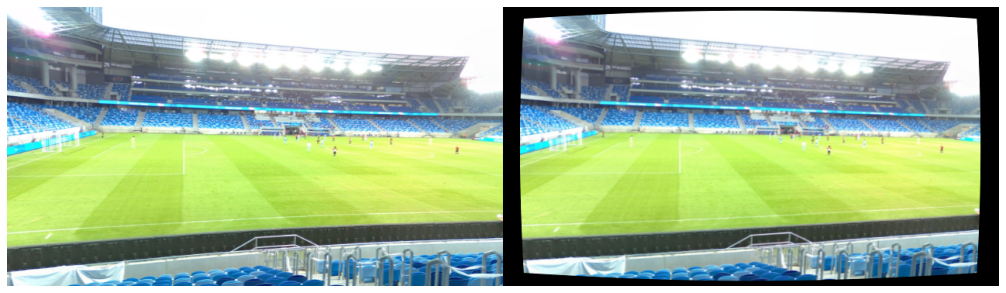

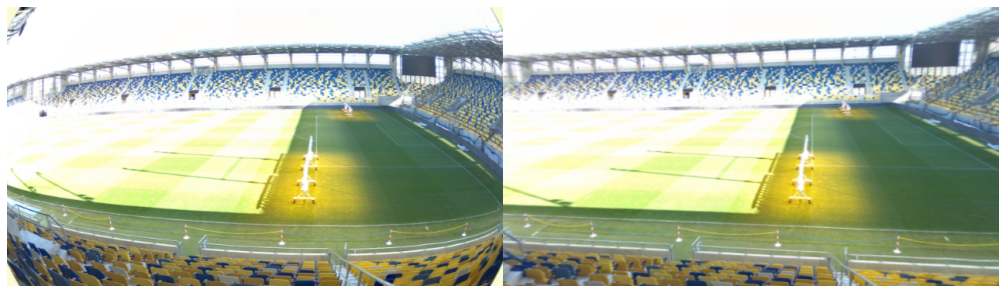

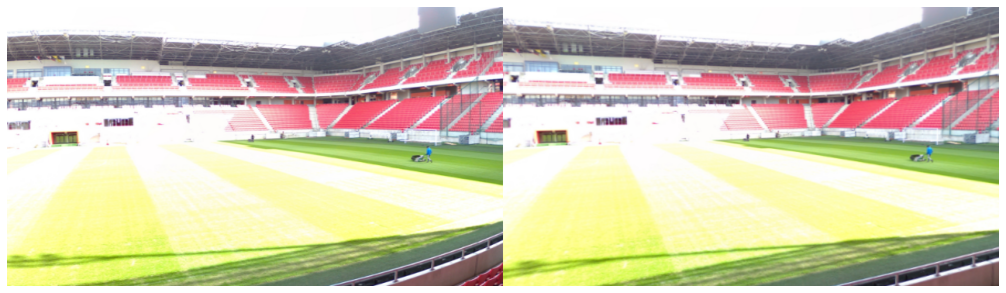

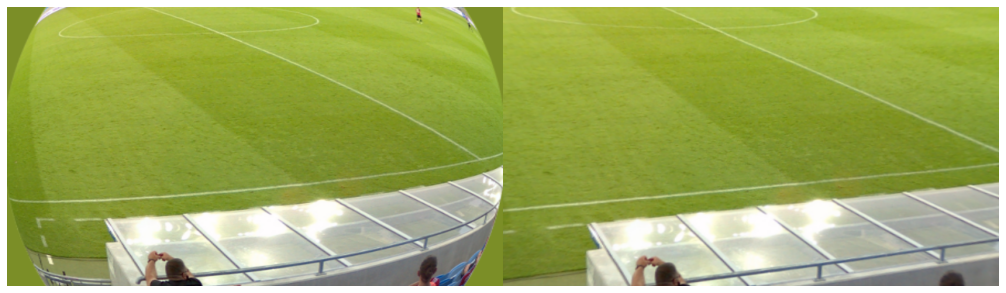

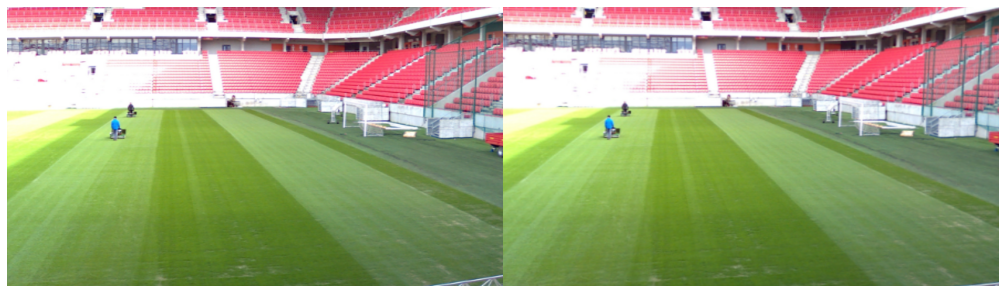

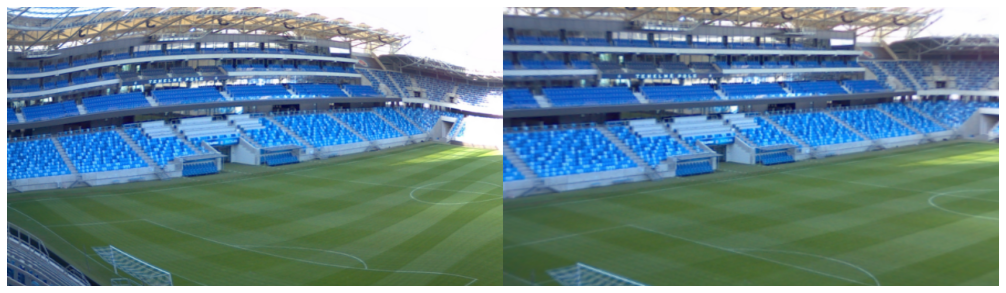

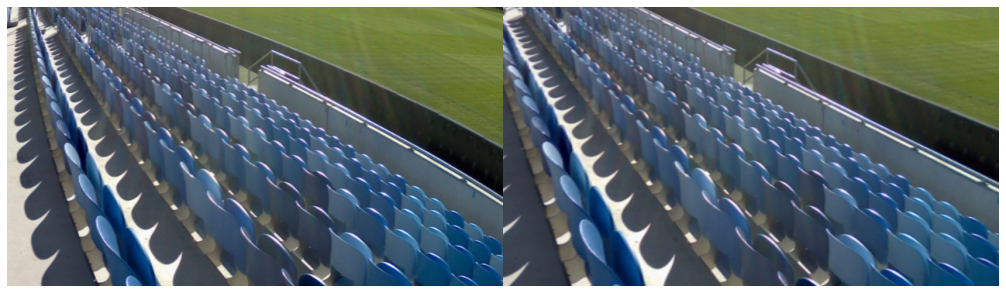

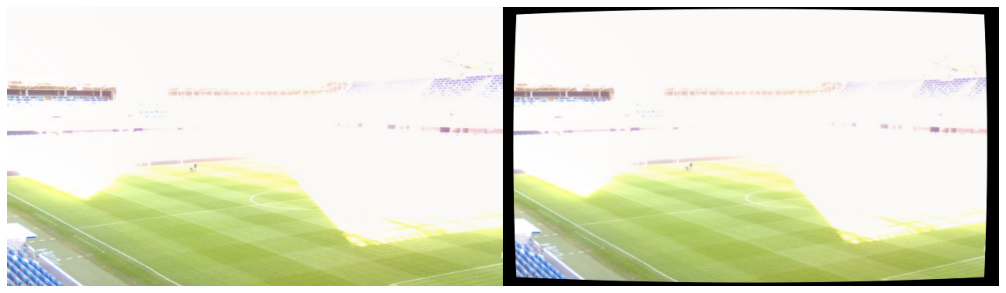

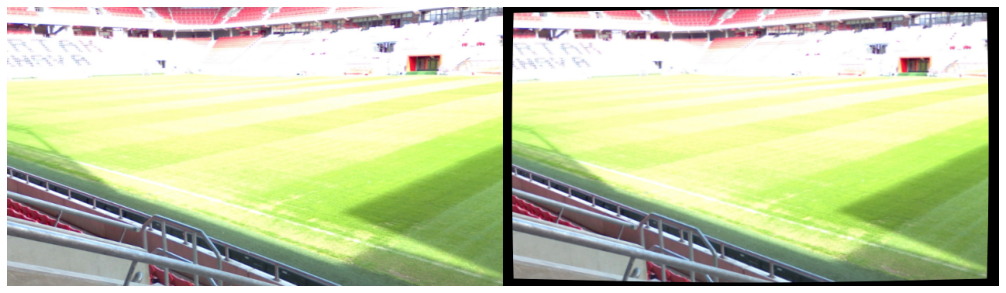

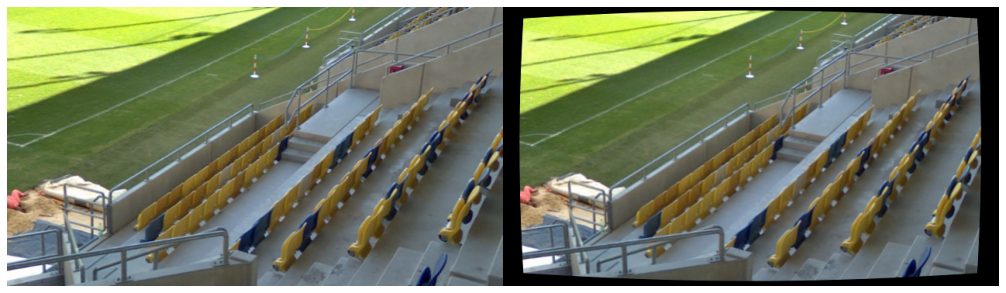

In [7]:
idx = np.random.choice(len(ds), 10, replace=False)
for i in idx:
    img, label = ds[i]
    displayAndFix(img, label, h=10)
